In [1]:
import os

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io

from helpers.cell_type_naming import nice_to_weirds, weird_to_nice

plotly.io.renderers.default = "jupyterlab+png"

### load tirosh sc data

In [2]:
sc_rna_seq = pd.read_csv(
    "gs://liulab/ftp/GSE115978/GSE115978_tpm.csv",
    index_col=0,
#     nrows=100,
).rename_axis(index="GeneSymbol", columns="cells")

g = len(sc_rna_seq)

sc_rna_seq

cells,cy78_CD45_neg_1_B04_S496_comb,cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb,CY88_5_B10_S694_comb,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb,cy78_CD45_neg_3_H06_S762_comb,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_G01_S73_comb,cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D09_S141_comb,CY88_3_D02_S614_comb,cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D06_S138_comb,cy53_1_CD45_neg_C06_S318_comb,...,monika_C11_S119_comb_BCD8_3,CY75_1_CD45_CD8_8__S331_comb_BCD8,CY75_1_CD45_CD8_7__S210_comb_BCD8,CY75_1_CD45_CD8_3__S142_comb_BCD8,CY75_1_CD45_CD8_7__S280_comb_BCD8,CY75_1_CD45_CD8_3__S168_comb_BCD8,CY75_1_CD45_CD8_8__S338_comb_BCD8,monika_D7_S132_comb_BCD8_3,CY75_1_CD45_CD8_8__S289_comb_BCD8,CY75_1_CD45_CD8_8__S351_comb_BCD8
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
C9orf152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RPS11,8.144184,5.915091,7.243164,6.019502,7.974753,5.557257,4.639058,7.655502,3.554834,8.791371,...,8.116349,5.756490,0.000000,5.258820,3.930454,5.945186,6.661408,6.792322,0.000000,4.820741
ELMO2,2.639232,0.000000,0.732052,3.687956,2.599318,1.691087,2.019346,0.136191,0.000000,1.724650,...,1.580145,0.000000,1.075875,0.000000,5.616211,0.000000,0.000000,0.000000,0.000000,6.166655
CREB3L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PNMA1,3.656496,0.000000,0.536053,3.041418,4.132741,2.827006,0.000000,2.873420,0.000000,4.787694,...,0.000000,1.407081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PIK3IP1,0.936591,5.761498,0.000000,0.000000,2.034216,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.018011,0.000000,1.491597,0.000000,0.000000,4.510139
SNRPD2,5.374866,0.000000,5.437661,6.240581,5.946754,4.628132,4.648580,4.330415,4.559981,5.664966,...,5.350462,0.000000,5.225853,3.966523,5.537203,6.792582,0.000000,0.000000,3.525944,6.218684
SLC39A6,3.326681,0.000000,1.308011,3.516141,3.868390,1.791189,0.000000,2.948601,4.368279,0.000000,...,0.000000,4.774840,4.881518,5.688656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
sc_rna_seq_metadata = pd.read_csv(
    "gs://liulab/ftp/GSE115978/GSE115978_cell.annotations.csv",
).replace({"cell.types": weird_to_nice})

sc_rna_seq_metadata

,cells,samples,cell.types,treatment.group,Cohort,no.of.genes,no.of.reads
0,cy78_CD45_neg_1_B04_S496_comb,Mel78,Malignant,post.treatment,Tirosh,8258,357919
1,cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb,Mel79,Malignant,treatment.naive,Tirosh,2047,5727
2,CY88_5_B10_S694_comb,Mel88,Malignant,post.treatment,Tirosh,5375,139218
3,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb,Mel79,Malignant,treatment.naive,Tirosh,5648,73996
4,cy78_CD45_neg_3_H06_S762_comb,Mel78,Malignant,post.treatment,Tirosh,7409,380341
...,...,...,...,...,...,...,...
7181,CY75_1_CD45_CD8_3__S168_comb_BCD8,Mel75,T CD8,post.treatment,Tirosh,3530,137245
7182,CY75_1_CD45_CD8_8__S338_comb_BCD8,Mel75,T CD8,post.treatment,Tirosh,3872,106432
7183,monika_D7_S132_comb_BCD8_3,Mel75,T CD8,post.treatment,Tirosh,4589,908173
7184,CY75_1_CD45_CD8_8__S289_comb_BCD8,Mel75,T CD8,post.treatment,Tirosh,4614,140903


In [4]:
sc_rna_seq_metadata["cell.types"].value_counts().sort_index()

?               307
B               818
CAF             106
Endothelial     104
Macrophage      420
Malignant      2018
NK               92
T CD4           856
T CD8          1759
T.cell          706
Name: cell.types, dtype: int64

In [5]:
cell_types = list(sorted(
    cell_type
    for cell_type in sc_rna_seq_metadata["cell.types"].unique()
    if cell_type not in ["?"]
))

c = len(cell_types)

cell_types

['B',
 'CAF',
 'Endothelial',
 'Macrophage',
 'Malignant',
 'NK',
 'T CD4',
 'T CD8',
 'T.cell']

In [6]:
s = 100  # number of samples
samples = pd.Series([f"sample_{j:0{len(str(s))}d}" for j in range(s)], name="Mixture")
samples

0     sample_000
1     sample_001
2     sample_002
3     sample_003
4     sample_004
         ...    
95    sample_095
96    sample_096
97    sample_097
98    sample_098
99    sample_099
Name: Mixture, Length: 100, dtype: object

In [7]:
n_cells_per_sample = 100

rng = np.random.default_rng(seed=0)
proportions = rng.dirichlet((1,) * c, size=(s,))
counts = [rng.multinomial(n_cells_per_sample, p) for p in proportions]

cell_type_counts_per_sample = pd.DataFrame(
    counts,
    index=samples,
    columns=cell_types
)

# how sparse are the counts?
# print((cell_type_counts_per_sample == 0).mean())

cell_type_counts_per_sample

,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell
Mixture,,,,,,,,,
sample_000,9,6,0,0,8,23,10,11,33
sample_001,36,23,0,12,0,6,2,18,3
sample_002,2,26,0,2,18,11,32,7,2
sample_003,21,21,3,4,13,3,10,9,16
sample_004,22,4,17,10,23,8,6,8,2
...,...,...,...,...,...,...,...,...,...
sample_095,35,8,0,8,15,12,11,7,4
sample_096,27,9,11,5,11,3,7,12,15
sample_097,2,6,5,21,29,14,8,5,10


In [8]:
fractions = cell_type_counts_per_sample / n_cells_per_sample

fractions_and_empty_csx_metrics = fractions.copy()
fractions_and_empty_csx_metrics[["P-value", "Correlation", "RMSE"]] = (0, 0, 0)

fractions_and_empty_csx_metrics.head()

,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell,P-value,Correlation,RMSE
Mixture,,,,,,,,,,,,
sample_000,0.09,0.06,0.00,0.00,0.08,0.23,0.10,0.11,0.33,0,0,0
sample_001,0.36,0.23,0.00,0.12,0.00,0.06,0.02,0.18,0.03,0,0,0
sample_002,0.02,0.26,0.00,0.02,0.18,0.11,0.32,0.07,0.02,0,0,0
sample_003,0.21,0.21,0.03,0.04,0.13,0.03,0.10,0.09,0.16,0,0,0
sample_004,0.22,0.04,0.17,0.10,0.23,0.08,0.06,0.08,0.02,0,0,0


In [9]:
cell_type_single_cells = {
    cell_type: sc_rna_seq_metadata.set_index(["cell.types", "cells"]).loc[cell_type].index.tolist()
    for cell_type in cell_types
}

for cell_type, stuff in cell_type_single_cells.items():
    print(cell_type, len(stuff))

B 818
CAF 106
Endothelial 104
Macrophage 420
Malignant 2018
NK 92
T CD4 856
T CD8 1759
T.cell 706


In [10]:
rng = np.random.default_rng(seed=0)

# needed for constructing mixtures
cell_type_geps_for_each_sample = dict()

# needed to compare with csx, because csx outputs stuff by cell type
sample_geps_for_each_cell_type = {
    cell_type: pd.DataFrame() 
    for cell_type in cell_types
}

for sample in cell_type_counts_per_sample.index:
    cell_type_geps = pd.DataFrame()
    for cell_type, count in cell_type_counts_per_sample.loc[sample].items():
        # sample with replacement from single cell data
        sampled_cells = rng.choice(cell_type_single_cells[cell_type], count)
        # average GEPs of sampled cells
        sampled_gep = sc_rna_seq[sampled_cells].mean(axis='columns').fillna(0)
        sample_geps_for_each_cell_type[cell_type][sample] = sampled_gep
        cell_type_geps[cell_type] = sampled_gep
#     cell_type_geps.fillna(0, inplace=True)
    cell_type_geps_for_each_sample[sample] = cell_type_geps

In [11]:
cell_type_geps_for_each_sample["sample_003"]

,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell
GeneSymbol,,,,,,,,,
C9orf152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RPS11,8.251074,7.867358,7.336177,7.374162,7.122176,3.074506,6.500718,7.007282,8.264470
ELMO2,0.686109,0.715759,1.945258,0.728952,0.586784,1.226758,1.023195,0.657618,0.813570
CREB3L1,0.000000,0.880175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PNMA1,0.000000,0.807137,0.000000,0.000000,0.427312,1.747648,0.000000,0.000000,0.318912
...,...,...,...,...,...,...,...,...,...
PIK3IP1,1.239239,0.873839,0.000000,2.336672,0.000000,0.000000,3.882857,2.329091,4.099025
SNRPD2,3.788838,4.658143,1.728914,3.422650,4.740245,1.054500,3.203975,1.718583,2.239307
SLC39A6,0.549111,1.226925,1.706549,0.713136,1.148054,0.000000,0.000000,0.442073,0.237548


In [12]:
sample_geps_for_each_cell_type["B"]

,sample_000,sample_001,sample_002,sample_003,sample_004,sample_005,sample_006,sample_007,sample_008,sample_009,...,sample_090,sample_091,sample_092,sample_093,sample_094,sample_095,sample_096,sample_097,sample_098,sample_099
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
C9orf152,0.000000,0.004110,0.000000,0.000000,0.000000,0.000000,0.000000,1.546090,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010568
RPS11,8.478828,8.238210,9.043730,8.251074,7.685641,8.276645,8.302045,7.367061,0.0,7.093196,...,6.674221,7.514035,8.376824,8.920646,8.156563,7.918037,8.112256,8.660407,8.138726,8.298436
ELMO2,0.415335,0.120816,2.555015,0.686109,1.193440,0.035898,0.000000,0.075813,0.0,1.871003,...,0.000000,0.000000,0.006726,0.000000,0.608029,0.443327,0.099183,0.000000,0.555500,0.153663
CREB3L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PNMA1,0.000000,0.000000,0.000000,0.000000,0.211741,0.139265,0.113944,0.000000,0.0,2.672450,...,0.000000,0.000000,0.000000,1.408656,0.102642,0.177886,0.084574,0.000000,0.297076,0.496847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PIK3IP1,2.874327,1.922330,3.001846,1.239239,3.262617,1.452275,0.442380,2.611297,0.0,3.523709,...,3.612305,1.461993,0.757405,2.762519,1.558232,2.179554,2.432731,2.453782,3.068706,3.613953
SNRPD2,2.444629,2.779659,6.470992,3.788838,2.969615,3.218044,2.721621,2.274906,0.0,4.887365,...,1.877187,3.731922,2.400870,5.908559,3.186624,3.464090,2.620612,5.979771,2.641943,3.666295
SLC39A6,0.439065,0.360573,0.000000,0.549111,0.714641,0.000000,0.524777,1.427447,0.0,0.000000,...,0.806133,0.000000,0.651829,0.000000,0.648139,0.320669,0.187595,0.000000,0.012412,0.558693


In [13]:
cell_type_geps_for_each_sample[sample] @ fractions.loc[sample]

GeneSymbol
C9orf152    0.010484
RPS11       7.069170
ELMO2       0.691010
CREB3L1     0.132803
PNMA1       0.659285
              ...   
PIK3IP1     2.623727
SNRPD2      3.412850
SLC39A6     0.498507
CTSC        3.316765
AQP7        0.108488
Length: 23686, dtype: float64

In [14]:
rng = np.random.default_rng(seed=0)

mixture_noise = rng.uniform(low=0, high=1.0, size=(g, s))

mixtures = pd.DataFrame({
    sample: sample_cell_type_geps @ fractions.loc[sample]
    for sample, sample_cell_type_geps in cell_type_geps_for_each_sample.items()
}) * 100 + mixture_noise

mixtures

,sample_000,sample_001,sample_002,sample_003,sample_004,sample_005,sample_006,sample_007,sample_008,sample_009,...,sample_090,sample_091,sample_092,sample_093,sample_094,sample_095,sample_096,sample_097,sample_098,sample_099
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
C9orf152,0.725103,0.417745,0.154674,0.016528,1.275473,0.912756,0.748780,6.913856,0.634478,2.731876,...,1.234269,0.967926,0.014706,1.836547,2.243832,1.039913,2.719365,1.192959,1.788337,1.870797
RPS11,740.076342,733.089278,722.961844,753.031861,707.266144,738.852990,683.229233,754.208118,710.323190,721.588170,...,721.733816,708.043214,714.459941,758.369584,743.229263,756.852154,719.350751,703.557602,728.891141,707.506906
ELMO2,98.446900,44.380885,98.367129,78.861998,80.754624,65.957986,69.010979,52.289577,92.497922,87.775527,...,77.665620,64.058907,82.399371,84.256978,90.317168,57.751134,65.602086,64.686510,94.528751,69.924772
CREB3L1,11.421700,23.353305,24.609541,19.195165,7.539390,1.558878,26.887239,0.813244,14.184842,16.913702,...,7.351392,0.757597,3.445945,26.552634,12.466430,4.321792,7.038825,6.402451,24.058124,13.677054
PNMA1,44.653549,37.166531,67.597456,32.855360,61.175672,59.315062,78.551119,29.922463,45.054356,49.508353,...,43.145106,31.933922,46.930996,69.833329,51.417171,34.837990,41.813217,63.291775,62.564110,66.771516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PIK3IP1,298.449935,150.465378,168.757648,179.266162,203.652736,168.975677,131.187457,289.486086,237.483199,224.209522,...,242.867962,234.833597,207.847001,273.472580,130.830662,205.849949,228.670377,173.424960,235.093591,263.127913
SNRPD2,289.278843,327.654182,396.210524,344.573773,342.276369,343.891111,319.847037,300.710153,283.542630,300.799371,...,281.338781,275.389221,299.087125,325.844097,326.936634,309.952301,315.824360,354.134996,348.786578,342.253333
SLC39A6,52.671472,67.543306,135.476498,68.575251,89.516748,52.740427,120.517220,54.984726,77.238352,77.132767,...,64.229955,40.590687,87.443665,63.810911,124.944480,46.710273,69.361075,110.856706,84.410989,50.453286


In [15]:
(mixtures.values < 0).any()

False

In [16]:
mixtures.sum(axis="rows")

sample_000    9.644523e+05
sample_001    9.788888e+05
sample_002    1.118730e+06
sample_003    1.016373e+06
sample_004    1.090838e+06
                  ...     
sample_095    9.915996e+05
sample_096    1.004119e+06
sample_097    1.125693e+06
sample_098    1.093114e+06
sample_099    1.018730e+06
Length: 100, dtype: float64

# set up cibersortx GEP imputation - "group" mode

In [17]:
base_path = os.path.abspath("./5c_results/group_mode")

In [18]:
!sudo chown -R jupyter:jupyter $base_path
!rm -r $base_path
# os.makedirs(base_path, exist_ok=True)
# os.makedirs(os.path.join(base_path, "in"), exist_ok=True)
!mkdir -p $base_path/in

path = os.path.join(base_path, "in", "mixtures_computed.txt")
mixtures.to_csv(path, sep="\t")
print(path)

path = os.path.join(base_path, "fractions_known_and_empty_csx_metrics.txt")
fractions_and_empty_csx_metrics.to_csv(path, sep="\t")
print(path)

path = os.path.join(base_path, "in", "dummy_geps.txt")
cell_type_geps_for_each_sample["sample_003"].to_csv(path, sep="\t")
print(path)

/home/jupyter/deconv/5c_results/group_mode/in/mixtures_computed.txt
/home/jupyter/deconv/5c_results/group_mode/fractions_known_and_empty_csx_metrics.txt
/home/jupyter/deconv/5c_results/group_mode/in/dummy_geps.txt
/home/jupyter/deconv/5c_results/group_mode
├── [6.0K]  fractions_known_and_empty_csx_metrics.txt
└── [4.0K]  in
    ├── [2.4M]  dummy_geps.txt
    └── [ 42M]  mixtures_computed.txt

1 directory, 3 files


In [18]:
!tree -h $base_path

/home/jupyter/deconv/5c_results/group_mode
├── [3.1M]  CIBERSORTxGEP_GEPs.txt
├── [3.8M]  CIBERSORTxGEP_GEPs_CVs.txt
├── [2.6M]  CIBERSORTxGEP_GEPs_Filtered.txt
├── [3.7M]  CIBERSORTxGEP_GEPs_Pvals.txt
├── [3.5M]  CIBERSORTxGEP_GEPs_Qvals.txt
├── [3.6M]  CIBERSORTxGEP_GEPs_StdErrs.txt
├── [593K]  CIBERSORTxGEP_GEPs_ThresholdPlots.pdf
├── [2.6M]  CIBERSORTxGEP_SM_GEPs_Filtered.txt
├── [7.2K]  CIBERSORTxGEP_Weights.txt
├── [6.0K]  fractions_known_and_empty_csx_metrics.txt
└── [4.0K]  in
    ├── [2.4M]  dummy_geps.txt
    └── [ 42M]  mixtures_computed.txt

1 directory, 12 files


In [19]:
!docker run \
    --rm \
    -it \
    -v $base_path/in:/src/data \
    -v $base_path:/src/outdir \
    cibersortx/gep:latest \
    --username lyronctk@stanford.edu \
    --token dfeba2c8b9d61daebee5fa87026b8e56 \
    --mixture mixtures_computed.txt \
    --cibresults fractions_known_and_empty_csx_metrics.txt \
    --sigmatrix dummy_geps.txt

!sudo chown -R jupyter:jupyter $base_path

>Running CIBERSORTx GEP imputation (representative profiles only)...
>[Options] username: lyronctk@stanford.edu
>[Options] token: dfeba2c8b9d61daebee5fa87026b8e56
>[Options] mixture: mixtures_computed.txt
>[Options] cibresults: fractions_known_and_empty_csx_metrics.txt
>[Options] sigmatrix: dummy_geps.txt
>Previous estimates of cell proportions detected. To rerun, use redocibersort=TRUE.
>Loaded 100 mixture samples, 23686 genes, and 9 cell subsets...
>Imputing representative cell type GEPs...done.
>Writing output to disk...done.
>Running time (sec): 35


In [19]:
!tree -h $base_path

/home/jupyter/deconv/5c_results/group_mode
├── [3.1M]  CIBERSORTxGEP_GEPs.txt
├── [3.8M]  CIBERSORTxGEP_GEPs_CVs.txt
├── [2.6M]  CIBERSORTxGEP_GEPs_Filtered.txt
├── [3.7M]  CIBERSORTxGEP_GEPs_Pvals.txt
├── [3.5M]  CIBERSORTxGEP_GEPs_Qvals.txt
├── [3.6M]  CIBERSORTxGEP_GEPs_StdErrs.txt
├── [593K]  CIBERSORTxGEP_GEPs_ThresholdPlots.pdf
├── [2.6M]  CIBERSORTxGEP_SM_GEPs_Filtered.txt
├── [7.2K]  CIBERSORTxGEP_Weights.txt
├── [6.0K]  fractions_known_and_empty_csx_metrics.txt
└── [4.0K]  in
    ├── [2.4M]  dummy_geps.txt
    └── [ 42M]  mixtures_computed.txt

1 directory, 12 files


In [20]:
pd.read_csv(
    os.path.join(base_path, "CIBERSORTxGEP_GEPs.txt"),
    sep="\t",
    index_col=0
)

,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell
GeneSymbol,,,,,,,,,
A1BG,19.373482,35.345657,32.025532,1.000000,52.068670,1.000000,13.766253,15.625160,1.000000
A1BG.AS1,22.263632,37.079416,2.704866,14.655521,20.410606,14.331229,12.403452,21.831381,21.425668
A1CF,5.369779,4.996558,1.000000,3.797632,2.012682,8.549615,5.530546,5.438815,3.058232
A2M,1.000000,239.555999,577.395226,263.289685,325.490402,1.000000,1.000000,1.000000,1.000000
A2M.AS1,1.661708,7.114607,26.740930,7.237761,22.950657,45.813978,14.708158,32.931075,8.244763
...,...,...,...,...,...,...,...,...,...
ZYG11A,106.243531,61.146381,76.327044,59.844431,49.762387,119.031736,105.661744,100.775790,106.334569
ZYG11B,84.003642,73.409261,96.805674,42.433188,77.383225,80.576903,92.462374,73.048896,75.578032
ZYX,57.590158,216.181407,132.554834,304.556454,94.695303,115.268794,78.372966,156.598140,110.087186


# set up cibersortx GEP imputation - "hires" mode

In [21]:
base_path = os.path.abspath("./5c_results/hires")

In [22]:
!sudo chown -R jupyter:jupyter $base_path
!rm -r $base_path
# os.makedirs(base_path, exist_ok=True)
# os.makedirs(os.path.join(base_path, "in"), exist_ok=True)
!mkdir -p $base_path/in

path = os.path.join(base_path, "in", "mixtures_computed.txt")
mixtures.to_csv(path, sep="\t")
print(path)

path = os.path.join(base_path, "fractions_known.txt")
fractions.to_csv(path, sep="\t")
print(path)

/home/jupyter/deconv/5c_results/hires/in/mixtures_computed.txt
/home/jupyter/deconv/5c_results/hires/fractions_known.txt
/home/jupyter/deconv/5c_results/hires
├── [5.4K]  fractions_known.txt
└── [4.0K]  in
    └── [ 42M]  mixtures_computed.txt

1 directory, 2 files


In [ ]:
!tree -h $base_path

In [23]:
!rm $base_path/CIBERSORT*

!docker run \
    --rm \
    -it \
    -v $base_path/in:/src/data \
    -v $base_path:/src/outdir \
    cibersortx/hires:latest \
    --username lyronctk@stanford.edu \
    --token dfeba2c8b9d61daebee5fa87026b8e56 \
    --mixture mixtures_computed.txt \
    --cibresults fractions_known.txt

'''
    --sigmatrix cell_type_geps_known.txt
'''

!sudo chown -R jupyter:jupyter $base_path

rm: cannot remove '/home/jupyter/deconv/5c_results/hires/CIBERSORT*': No such file or directory
>Running CIBERSORTx high-resolution GEP imputation...
>[Options] username: lyronctk@stanford.edu
>[Options] token: dfeba2c8b9d61daebee5fa87026b8e56
>[Options] mixture: mixtures_computed.txt
>[Options] cibresults: fractions_known.txt
>Loaded 100 mixture samples, 23686 genes, and 9 cell subsets...
>Window size adaptively set to 36
>Imputing high-resolution cell type GEPs...done.
>Writing output to disk ...done.
>Running time (sec): 442


In [23]:
!tree -h $base_path

/home/jupyter/deconv/5c_results/hires
├── [ 46M]  CIBERSORTxHiRes_NA_B_Window36.txt
├── [ 47M]  CIBERSORTxHiRes_NA_CAF_Window36.txt
├── [ 47M]  CIBERSORTxHiRes_NA_Endothelial_Window36.txt
├── [169K]  CIBERSORTxHiRes_NA_Heatmap_B_Window36.png
├── [221K]  CIBERSORTxHiRes_NA_Heatmap_CAF_Window36.png
├── [185K]  CIBERSORTxHiRes_NA_Heatmap_Endothelial_Window36.png
├── [ 77K]  CIBERSORTxHiRes_NA_Heatmap_Macrophage_Window36.png
├── [227K]  CIBERSORTxHiRes_NA_Heatmap_Malignant_Window36.png
├── [162K]  CIBERSORTxHiRes_NA_Heatmap_NK_Window36.png
├── [177K]  CIBERSORTxHiRes_NA_Heatmap_T.cell_Window36.png
├── [200K]  CIBERSORTxHiRes_NA_Heatmap_TCD4_Window36.png
├── [218K]  CIBERSORTxHiRes_NA_Heatmap_TCD8_Window36.png
├── [ 47M]  CIBERSORTxHiRes_NA_Macrophage_Window36.txt
├── [ 47M]  CIBERSORTxHiRes_NA_Malignant_Window36.txt
├── [ 46M]  CIBERSORTxHiRes_NA_NK_Window36.txt
├── [ 47M]  CIBERSORTxHiRes_NA_T.cell_Window36.txt
├── [ 47M]  CIBERSORTxHiRes_NA_TCD4_Window36.txt
├── [ 47M]  CIBERSORTxHiRes_N

In [68]:
real = sample_geps_for_each_cell_type["B"]

imputed = pd.read_csv(
    os.path.join(base_path, "CIBERSORTxHiRes_NA_B_Window36.txt"),
    sep="\t",
    index_col=0
).set_index(real.index)

truth_and_imputed = pd.concat({"truth": real, "imputed": imputed}, axis=1).stack()

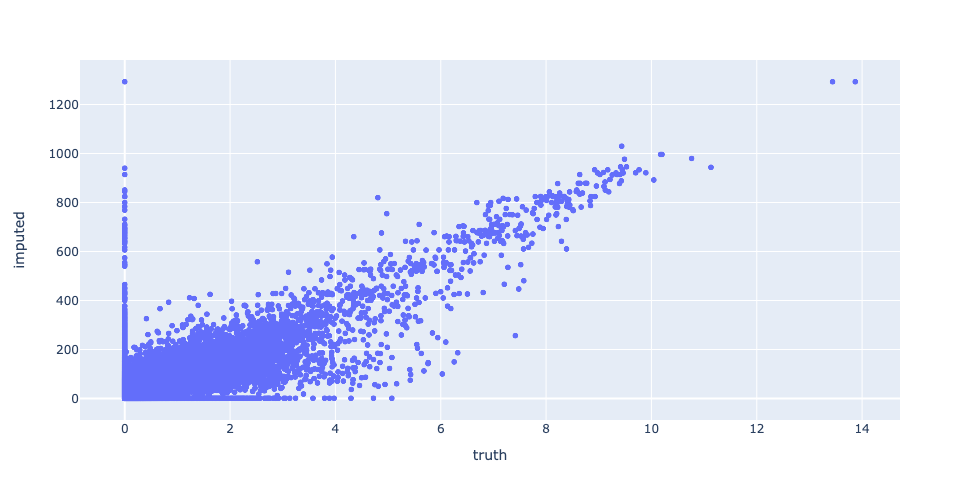

In [70]:
px.scatter(
    truth_and_imputed.sample(50000),
    x="truth",
    y="imputed"
)